# AI BASED DIABETICS PREDICTION
#### Development 2

## Importing Libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Loading Preprocessed Data

In [2]:
data = pd.read_csv("E:\diabetics\preprocessed_diabetes_data.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,35,0,0.204013,0.627,1.425995,1
1,-0.844885,-1.123396,-0.160546,29,0,-0.684422,0.351,-0.190672,0
2,1.233880,1.943724,-0.263941,0,0,-1.103255,0.672,-0.105584,1
3,-0.844885,-0.998208,-0.160546,23,94,-0.494043,0.167,-1.041549,0
4,-1.141852,0.504055,-1.504687,35,168,1.409746,2.288,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,48,180,0.115169,0.171,2.532136,0
764,-0.547919,0.034598,0.046245,27,0,0.610154,0.340,-0.531023,0
765,0.342981,0.003301,0.149641,23,112,-0.735190,0.245,-0.275760,0
766,-0.844885,0.159787,-0.470732,0,0,-0.240205,0.349,1.170732,1


## Split the data

In [3]:
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


##  Train the Decision Tree Model

In [5]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Evaluate the Model

In [6]:
# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7467532467532467


In [7]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [8]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[75 24]
 [15 40]]


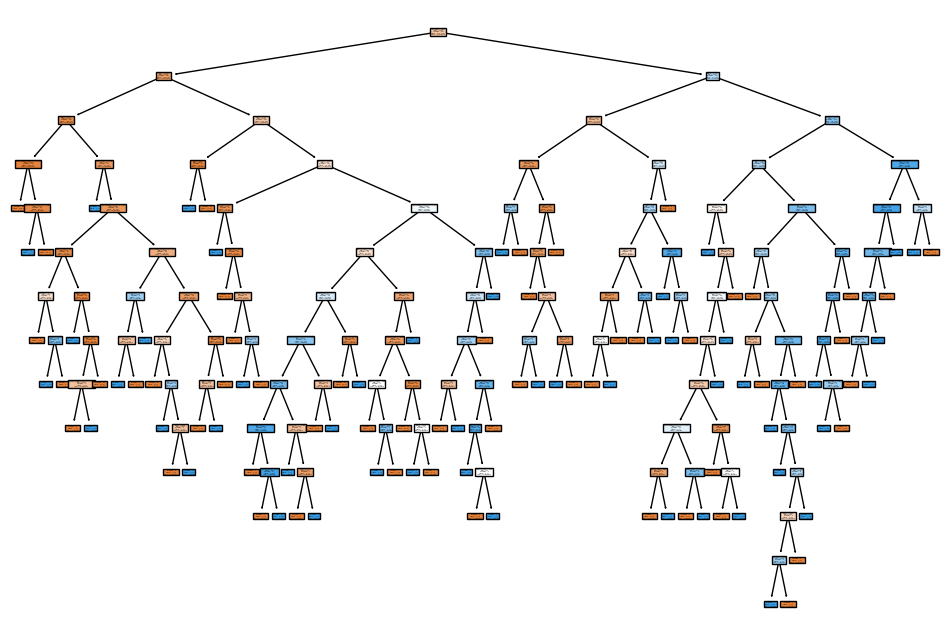

In [9]:
# Visualize the decision tree 
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


## Save the model

In [12]:
joblib.dump(decision_tree, 'E:/diabetics/diabetes_decision_tree_model.pkl')

['E:/diabetics/diabetes_decision_tree_model.pkl']